In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./LeptonP.npz
./WmBoson.npz
./LpNu.npz
./neutrino-momentum-reconstruction.ipynb
./WpBoson.npz
./MET.npz
./CGLMP.npz
./LeadLepton.npz
./LmNu.npz
./diNuPz_est.npy
./Higgs.npz
./subLeadLepton.npz
./xi_xyz.npz
./LeptonM.npz
./archive.zip
./CGLMP_NN.ipynb
./diLepton.npz
./.ipynb_checkpoints/neutrino-momentum-reconstruction-checkpoint.ipynb
./.ipynb_checkpoints/CGLMP_NN-checkpoint.ipynb


In [3]:
PLepton = np.load(filepath+'LeptonP.npz')
print('Positive lepton information include: ', PLepton.files)
PLepton = pd.DataFrame.from_dict({item: PLepton[item] for item in PLepton.files}, orient='columns')

MLepton = np.load(filepath+'LeptonM.npz')
print('Negative lepton information include: ', MLepton.files)
MLepton = pd.DataFrame.from_dict({item: MLepton[item] for item in MLepton.files}, orient='columns')

PNeutrino = np.load(filepath+'LpNu.npz')
print('Neutrino information include: ', PNeutrino.files)
PNeutrino = pd.DataFrame.from_dict({item: PNeutrino[item] for item in PNeutrino.files}, orient='columns')

MNeutrino = np.load(filepath+'LmNu.npz')
print('Anti-Neutrino information include: ', MNeutrino.files)
MNeutrino = pd.DataFrame.from_dict({item: MNeutrino[item] for item in MNeutrino.files}, orient='columns')


Positive lepton information include:  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']
Negative lepton information include:  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']
Neutrino information include:  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']
Anti-Neutrino information include:  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']


In [4]:
PLepton

,E,px,py,pz,m,pt,eta,phi,y
0,199606.906250,11699.104492,36842.246094,195828.234375,0.511000,38655.143812,2.325307,1.263321,2.325307
1,59176.847656,42191.867188,-3188.929199,-41371.066406,105.660004,42312.207768,-0.865558,-0.075438,-0.865556
2,128507.000000,14652.354492,44623.097656,-119616.578125,105.660004,46967.141031,-1.664479,1.253530,-1.664476
3,49717.527344,30798.656250,-2068.025391,38974.191406,105.660004,30868.008614,1.055445,-0.067046,1.055440
4,46875.257812,-22756.236328,5705.294434,40581.929688,0.511000,23460.534444,1.315830,2.895943,1.315830
...,...,...,...,...,...,...,...,...,...
2447965,16693.417969,13079.869141,-4246.598145,-9463.278320,0.511000,13751.966134,-0.642923,-0.313930,-0.642923
2447966,15234.187500,-2414.755859,-13895.593750,-5758.637695,0.511000,14103.849529,-0.397733,-1.742857,-0.397733
2447967,81042.835938,-30983.546875,-71060.898438,-23628.337891,105.660004,77521.812825,-0.300264,-1.981959,-0.300263
2447968,67651.000000,1146.312744,7630.722656,67209.492188,0.511000,7716.343769,2.860900,1.421688,2.860900


In [5]:
variables = ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']
var_labels = ['E', r'$p_x$', r'$p_y$', r'$p_z$', 'm', r'$p_t$', r'$\eta$', r'$\phi$', 'y']
GeV = 0.001

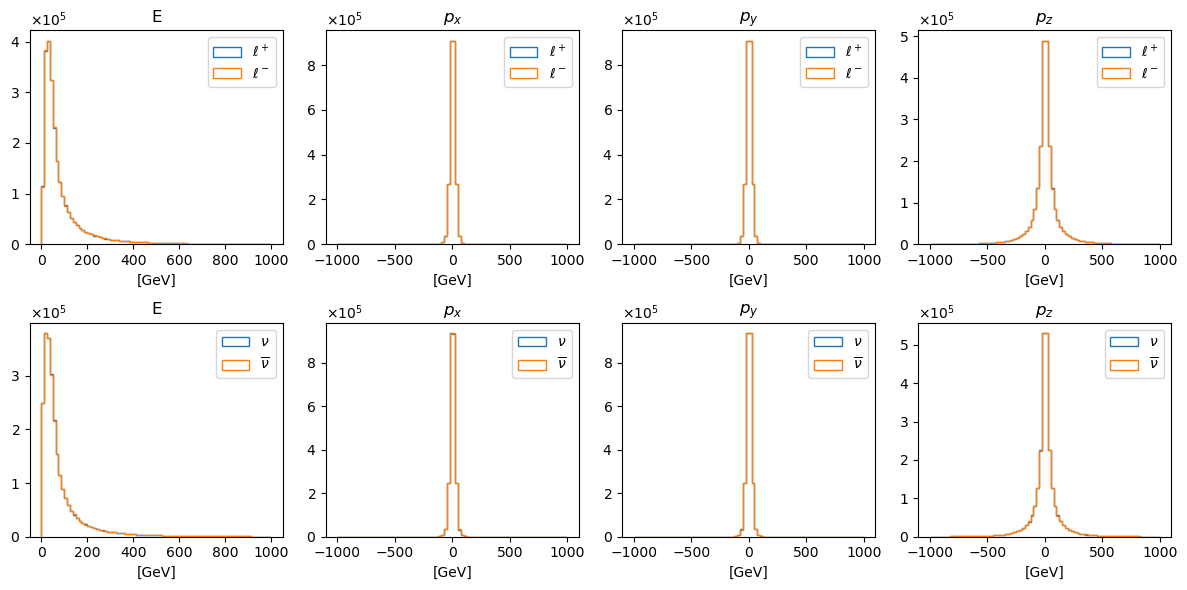

In [6]:
plt_range = [(0, 1000), (-1000, 1000), (-1000, 1000), (-1000, 1000), (0, 1000), (-1000, 1000), (-1000, 1000), (-1000, 1000)]
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
ax = ax.flatten()
for i, j in enumerate(ax):
    j.set_title(var_labels[i%4])
    if i < 4:
        j.hist(PLepton[variables[i]]*GeV, histtype='step', range=plt_range[i], bins=80, label=r'$\ell^+$')
        j.hist(MLepton[variables[i]]*GeV, histtype='step', range=plt_range[i], bins=80, label=r'$\ell^-$')
    else:
        j.hist(PNeutrino[variables[i%4]]*GeV, histtype='step', range=plt_range[i], bins=80, label=r'$\nu$')
        j.hist(MNeutrino[variables[i%4]]*GeV, histtype='step', range=plt_range[i], bins=80, label=r'$\overline{\nu}$')
    j.legend()
    j.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    j.set_xlabel('[GeV]')
plt.tight_layout()

In [7]:
def vec_unit(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return x/r, y/r, z/r

def vec_mag(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def vec_cos(ax, ay, az, bx, by, bz):
    ra = np.sqrt(ax**2 + ay**2 + az**2)
    rb = np.sqrt(bx**2 + by**2 + bz**2)
    return (ax*bx + ay*by + az*bz)/(ra*rb)

def inv_mass(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return np.sqrt(E**2 - P2)

In [8]:
anomalies = np.where(vec_mag(PNeutrino['px']+MNeutrino['px'],
                             PNeutrino['py']+MNeutrino['py'],
                             PNeutrino['pz']+MNeutrino['pz']) > PNeutrino['E']+MNeutrino['E'], 1, 0) # Check cases where E**2 - p**2 < 0
# rare cases when E**2 - p**2 < 0 , drop these events for now , results show 3 out of 2447970 events
for i, j in enumerate(anomalies):
    if j == 1:
        print(i)

638488
835579
2168342


In [9]:
PLepton = PLepton.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)
PNeutrino = PNeutrino.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)
MLepton = MLepton.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)
MNeutrino = MNeutrino.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)
#2447970 -> 2447967 drop 3 rows

In [10]:
diNuMass = inv_mass(PNeutrino['E' ]+MNeutrino['E' ],
                    PNeutrino['px']+MNeutrino['px'],
                    PNeutrino['py']+MNeutrino['py'],
                    PNeutrino['pz']+MNeutrino['pz'])

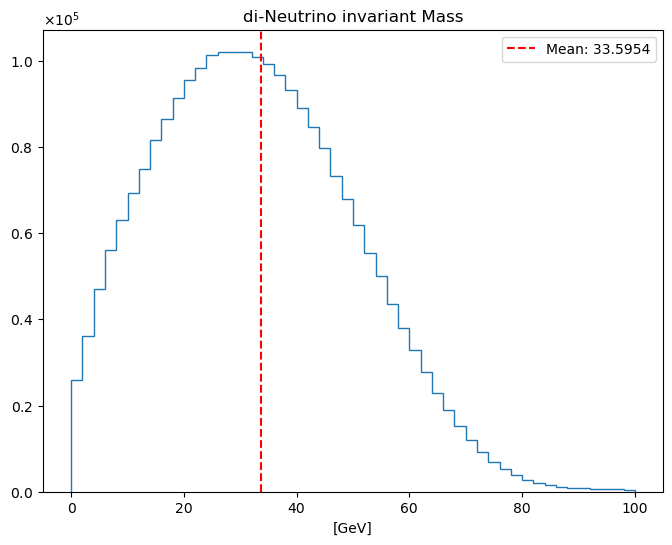

In [11]:
fig = plt.figure(figsize = (8, 6))
plt.title('di-Neutrino invariant Mass')
plt.hist(diNuMass[diNuMass < 10**5]*GeV, bins=50, histtype='step')
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.xlabel('[GeV]')
plt.axvline(np.mean(diNuMass)*GeV, c='r', ls='dashed', label=f'Mean: {"%.4f"%np.mean(diNuMass*GeV)}')
plt.legend()

## Analytical methods to approximate di-Neutrino $p_Z$
Ref. [Spinning The Higgs](http://cds.cern.ch/record/2012081)
### Energy-momentum relation of the Higgs boson in the two lepton-neutrino pair final state ( $H \to W^+ W^- \to \ell^+ \: \nu \: \ell^- \: \overline{\nu}$ )

\begin{equation}
{M_H}^2 = 2E^{\ell \ell} E^{\nu \nu} - 2\vec{p}_{\ell \ell} \cdot \vec{p}_{\nu \nu} + {M_{\ell \ell}}^2 + {M_{\nu \nu}}^2
\end{equation}
$M_H = 125$ GeV. The relation $E^2 = p^2 + m^2$ is immediately applied. The only unknown in this equation is the di-Neutrino kinematics.
Here we make our first assumption: the missing energy is attributed to the di-Neutrino momentum on the transverse plane.  

\begin{equation}
{E_{\nu \nu}}^2 = |\vec{p}_{\nu \nu}|^2 + {M_{\nu \nu}}^2 = {E_T^\text{miss}}^2 + {p_z^{\nu \nu}}^2  + {M_{\nu \nu}}^2
\end{equation}

More compactly, define the constants  

\begin{equation}
{M_\text{fix}}^2 = {M_H}^2 - {M_{\ell \ell}}^2 - {M_{\nu \nu}}^2 + 2p_x^{\ell \ell} E_x^\text{miss} + 2p_y^{\ell \ell} E_y^\text{miss} 
\end{equation}
di-Neutrino mass takes assumed value of 33.5954 GeV according to the dataset average
The quadratic equation to solve:  

\begin{equation}
0 = \underbrace{\left[{p_z^{\ell \ell}}^2 - {E_{\ell \ell}}^2 \right]}_{a} {p_z^{\nu \nu}}^2
  + \underbrace{{M_\text{fix}}^2 p_z^{\ell \ell}}_{b} p_z^{\nu \nu}
  + \underbrace{\left\{\frac{1}{4} {M_\text{fix}}^2 - {E_{\ell \ell}}^2 \left[ {E_T^\text{miss}}^2 + {M_{\nu\nu}}^2 \right] \right\}}_{c}
\end{equation}

Determinant: $\Delta = b^2 - 4ac$
* if $\Delta = 0$ the solution is obtained
* if $\Delta < 0$ recalculate with $M_{\nu \nu} = 0$
    * if $\Delta < 0$ after the second time, use the following equation, extremize the derivative of the Higgs mass energy-momentum equation
\begin{equation}
p_z^{\nu \nu} = p_z^{\ell \ell} \frac{ \sqrt{ {E_T^\text{miss}}^2 + {M_{\nu \nu}}^2 } }{ \sqrt{ {E_T^{\ell \ell}}^2 - {p_z^{\ell \ell}}^2 } }
\end{equation}
       $M_{\nu \nu}$ is kept at 0
* if $\Delta > 0$ choose the *better solution* using the minimal $|\cos(\psi^*_{\ell \ell})|$ method
$\psi^*_{\ell \ell}$ is the opening angle between the di-Lepton momentum and the beam axis ($\hat{z}$) in the reconstructed Higgs rest frame, denoted by the asterisk (\*)

In [12]:
MET = np.load(filepath+'MET.npz')
print("Missing Transverse Energy energy information include: ", MET.files)
MET = pd.DataFrame.from_dict({item: MET[item] for item in MET.files}, orient='columns')
MET = MET.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)

diLepton = np.load(filepath+'diLepton.npz')
print("di-Lepton information include: ", diLepton.files)
diLepton = pd.DataFrame.from_dict({item: diLepton[item] for item in diLepton.files}, orient='columns')
diLepton = diLepton.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)

Higgs = np.load(filepath+'Higgs.npz')
print("Higgs information include: ", Higgs.files)
Higgs = pd.DataFrame.from_dict({item: Higgs[item] for item in Higgs.files}, orient='columns')
Higgs = Higgs.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)

Missing Transverse Energy energy information include:  ['pt', 'px', 'py', 'phi']
di-Lepton information include:  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']
Higgs information include:  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y']


In [13]:
Higgs['m'][638488] # check for keyerror (fixed after reset_index)

125001.648438

In [14]:
os.system('pip install pylorentz')
from pylorentz import Momentum4
# in console: pip install pylorentz
'''
higgs = Momentum4.m_eta_phi_pt(m, 2, 0, 250)
tau_1.boost_particle(higgs)
'''

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pylorentz: filename=pylorentz-0.3.3-py3-none-any.whl size=12101 sha256=0f96797bddd3b68b57c391bc7385d0afba0680de2ccf0abb3e346b55767b0f44
  Stored in directory: /root/.cache/pip/wheels/ec/8c/e8/b87f17eae26931058525533e2641e351203f95110d94f985cc
Successfully built pylorentz


'\nhiggs = Momentum4.m_eta_phi_pt(m, 2, 0, 250)\ntau_1.boost_particle(higgs)\n'

In [15]:
mH = 125 # 125 GeV SM Higgs
diNuMassMean = np.mean(diNuMass*GeV)

def MFix2(llm, llpx, llpy, vvm, mpx, mpy):
    return(mH**2 - llm**2 - vvm**2 + 2*llpx*mpx + 2*llpy*mpy)

def diNuPzA(llpz, llE):
    return (llpz**2 - llE**2)

def diNuPzB(llpz, Mf2):
    return (Mf2 * llpz)

def diNuPzC(llE, met, Mf2, vvm):
    return (0.25*Mf2**2 - llE**2 * (met**2 + vvm**2))

def mH_derivative(met, llE, llpz):
    #numer = np.sqrt(met**2)
    denom = np.sqrt(llE**2 - llpz**2)
    return (llpz*met/denom)

def determinant(a, b, c):
    return b**2 - 4*a*c

def quadratic(a, b, c):
    sol1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    sol2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    return sol1, sol2

def diNuPzEq(llE, llpx, llpy, llpz, llm, llpt, lleta, llphi, met, mpx, mpy):
    diNuPz = 0
    Mf2 = MFix2(llm, llpx, llpy, diNuMassMean, mpx, mpy)
    #print('M fix:', Mf2)
    A = diNuPzA(llpz, llE)
    #print('A: ', A)
    B = diNuPzB(llpz, Mf2)
    #print('B: ', B)
    C = diNuPzC(llE, met, Mf2, diNuMassMean)
    #print('C: ', C)
    D = determinant(A,B,C)
    #print('D: ', D)
    if(D == 0):
        diNuPz = -B/(2*A)
    
    elif(D < 0):
        Mf2 = MFix2(llm, llpx, llpy, 0, mpx, mpy)
        A = diNuPzA(llpz, llE)
        B = diNuPzB(llpz, Mf2)
        C = diNuPzC(llE, met, Mf2, 0)
        D = determinant(A,B,C)
        if(D == 0):
             diNuPz = -B/(2*A)
        elif(D < 0):
            diNuPz = mH_derivative(met, llE, llpz)    
    
    if(D > 0):
        sol1, sol2 = quadratic(A, B, C)
        #print('solutions: ', sol1, sol2)
        #diNuPz = min(np.abs(sol1),np.abs(sol2))
        #'''
        eta_star = [0,0]
        diLepP4 = Momentum4.m_eta_phi_pt(llm, lleta, llphi, llpt)
        for i, j in enumerate([sol1,sol2]):
            Hpx = llpx + mpx
            Hpy = llpy + mpy
            Hpz = llpz + j
            Hpt = np.sqrt(Hpx**2 + Hpy**2)
            Hphi = np.arctan2(Hpx, Hpy)
            Heta = 0.5*np.log((vec_mag(Hpx, Hpy, Hpz) + Hpz)/(vec_mag(Hpx, Hpy, Hpz) - Hpz))
            Higgs_rf = Momentum4.m_eta_phi_pt(125, Heta, Hphi, Hpt)
            diLepP4 = diLepP4.boost_particle(Higgs_rf)
            eta_star[i] = diLepP4.eta
        #print('Eta*: ', eta_star)
        if (np.abs(eta_star[0]) < np.abs(eta_star[1])):
            diNuPz = sol1
        elif (np.abs(eta_star[0]) > np.abs(eta_star[1])):
            diNuPz = sol2
        #'''
    
            
    return diNuPz

In [16]:
VdiNuPzEq = np.vectorize(diNuPzEq)

In [17]:
evt_id = 638488
print('  E_ll  :',diLepton['E'][evt_id]*GeV, '\n',
       'px_ll  :',diLepton['px'][evt_id]*GeV,'\n',
       'py_ll  :',diLepton['py'][evt_id]*GeV,'\n',
       'pz_ll  :',diLepton['pz'][evt_id]*GeV,'\n',
       ' M_ll  :',diLepton['m'][evt_id]*GeV,'\n',
       'pt_ll  :',diLepton['pt'][evt_id]*GeV,'\n',
       'eta_ll :',diLepton['eta'][evt_id],'\n',
       'phi_ll :',diLepton['phi'][evt_id],'\n',
       'px_miss:', MET['py'][evt_id]*GeV, '\n',
       'py_miss:', MET['px'][evt_id]*GeV, '\n',
       'pT_miss:', MET['pt'][evt_id]*GeV)

  E_ll  : 556.94046875 
 px_ll  : 27.298652832000002 
 py_ll  : -22.184181641 
 pz_ll  : -554.4226875 
  M_ll  : 39.507150685 
 pt_ll  : 35.176048122 
 eta_ll : -3.451714 
 phi_ll : -0.682405 
 px_miss: 51.076724243 
 py_miss: -29.285859375 
 pT_miss: 58.876933673


In [18]:
Mf2 = MFix2(diLepton['m'][evt_id]*GeV, diLepton['px'][evt_id]*GeV, diLepton['py'][evt_id]*GeV, diNuMassMean, MET['px'][evt_id]*GeV, MET['py'][evt_id]*GeV)
print('M fix:\n', Mf2)
print('A:\n', diNuPzA(diLepton['pz'][evt_id]*GeV, diLepton['E'][evt_id]*GeV))
print('B:\n',diNuPzB(diLepton['pz'][evt_id]*GeV, Mf2))
print('C:\n', diNuPzC(diLepton['E'][evt_id]*GeV, MET['pt'][evt_id]*GeV, Mf2, diNuMassMean))
print('di-Neutrino Pz:\n', (PNeutrino['pz'][evt_id]+MNeutrino['pz'][evt_id])*GeV)

M fix:
 9070.41237582952
A:
 -2798.169316747051
B:
 -5028842.406140664
C:
 -1404766730.229597
di-Neutrino Pz:
 -530.9714375


In [19]:
%%time
evt_id = [1,2,3]
print(VdiNuPzEq(diLepton['E'][evt_id]*GeV, diLepton['px'][evt_id]*GeV, diLepton['py'][evt_id]*GeV, diLepton['pz'][evt_id]*GeV,
                diLepton['m'][evt_id]*GeV, diLepton['pt'][evt_id]*GeV, diLepton['eta'][evt_id], diLepton['phi'][evt_id],
                MET['pt'][evt_id]*GeV, MET['px'][evt_id]*GeV, MET['py'][evt_id]*GeV))

[  2.37952158 -68.88974529 -53.31544351]
CPU times: user 12.6 ms, sys: 2.1 ms, total: 14.7 ms
Wall time: 15.1 ms


In [27]:
diNeutrinoPz = np.zeros(len(Higgs['m']))


diNeutrinoPz = VdiNuPzEq(diLepton['E']*GeV, diLepton['px']*GeV, diLepton['py']*GeV, diLepton['pz']*GeV,
                         diLepton['m']*GeV, diLepton['pt']*GeV, diLepton['eta'], diLepton['phi'],
                         MET['pt']*GeV, MET['px']*GeV, MET['py']*GeV)
# entire process is approximately 20 minutes

In [31]:
filepath  = '/kaggle/input/ggf-hww-lvlv-signal-sample/'
np.save('/kaggle/working/diNuPz_est',diNeutrinoPz)

## Performance Evaluation

In [23]:
diNeutrinoPz = np.load(filepath+'diNuPz_est.npy')

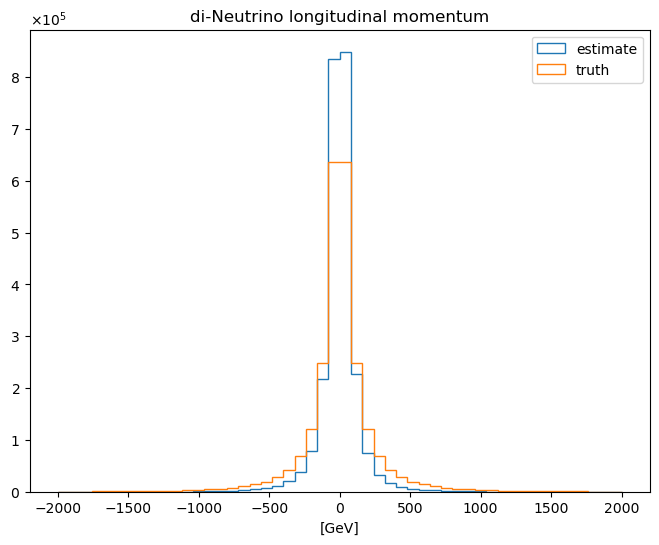

In [24]:
fig = plt.figure(figsize = (8, 6))
plt.title('di-Neutrino longitudinal momentum')
plt.hist(diNeutrinoPz, histtype='step', bins=50, range=[-2000,2000], label='estimate')
plt.hist(PNeutrino['pz']*GeV + MNeutrino['pz']*GeV, histtype='step', bins=50, range=[-2000,2000], label='truth')
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.xlabel('[GeV]')
plt.legend()

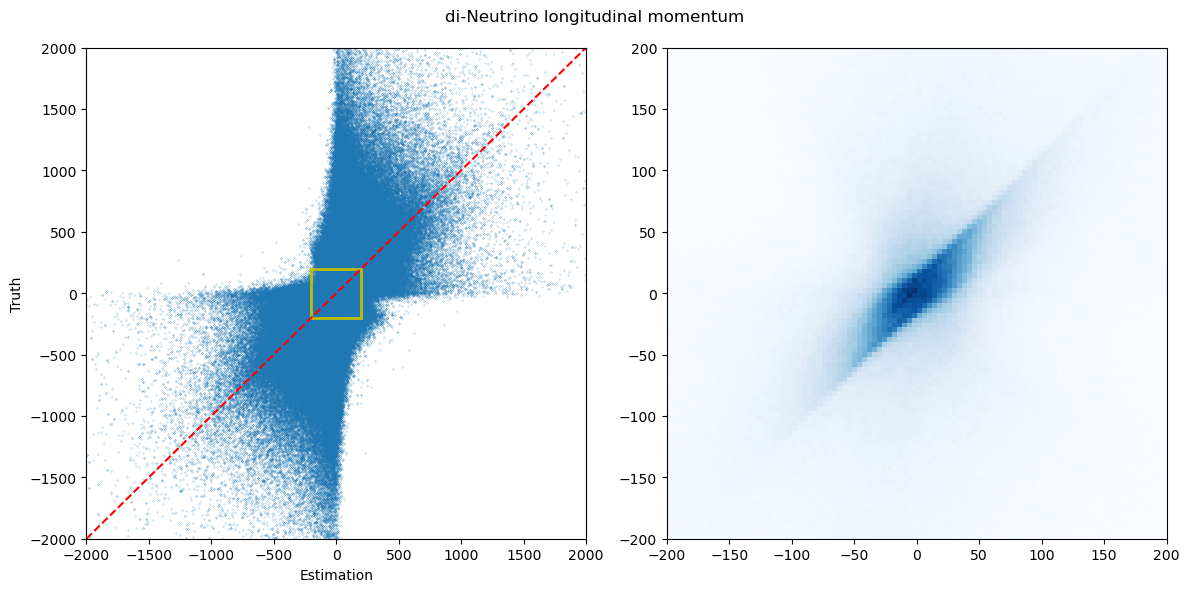

In [25]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 6))
ax = ax.flatten()
plt.suptitle('di-Neutrino longitudinal momentum')
ax[0].scatter(diNeutrinoPz,(PNeutrino['pz'] + MNeutrino['pz'])*GeV, s=0.1, marker='.')
ax[0].set_xlim(-2000, 2000)
ax[0].set_ylim(-2000, 2000)
ax[0].plot([-2000,2000],[-2000,2000], ls='dashed', c='r')
ax[0].set_xlabel('Estimation')
ax[0].set_ylabel('Truth')
ax[0].add_patch(Rectangle((-200, -200), 400, 400,
                edgecolor = 'y',
                fill=False,
                lw=2))
ax[1].hist2d(diNeutrinoPz, (PNeutrino['pz'] + MNeutrino['pz'])*GeV, bins=[100,100], range=[[-200, 200],[-200, 200]], cmap='Blues')
plt.tight_layout()

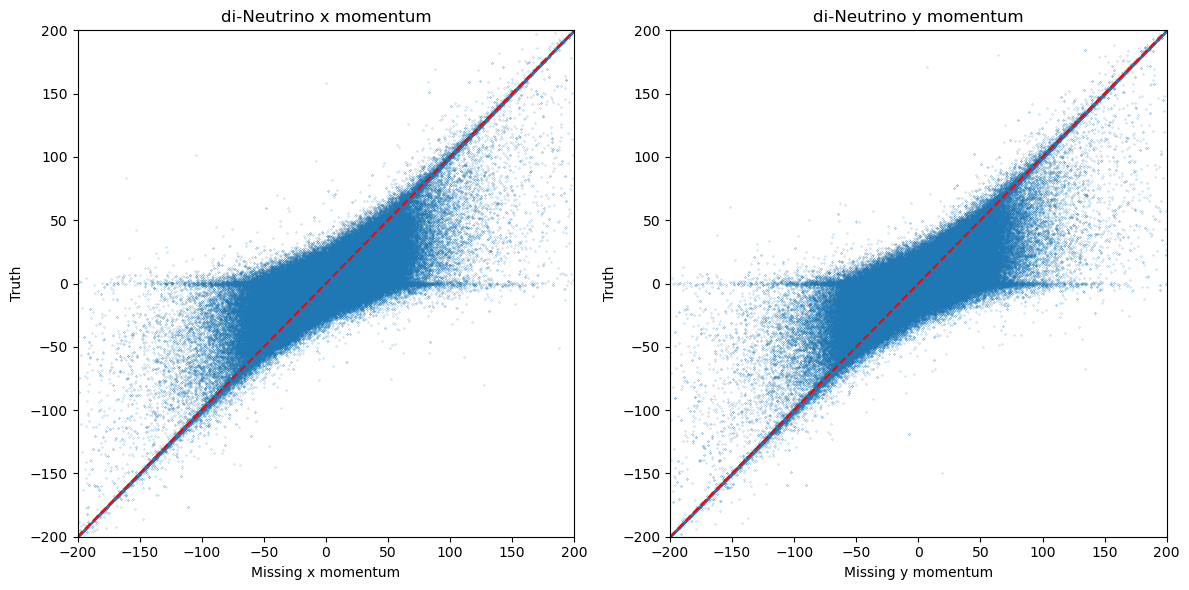

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 6))
ax = ax.flatten()
ax[0].set_title('di-Neutrino x momentum')
ax[0].scatter(MET['px']*GeV, (PNeutrino['px'] + MNeutrino['px'])*GeV, s=0.1, marker='.')
ax[0].set_xlim(-200, 200)
ax[0].set_ylim(-200, 200)
ax[0].plot([-200,200],[-200,200], ls='dashed', c='r')
ax[0].set_xlabel('Missing x momentum')
ax[0].set_ylabel('Truth')
ax[1].set_title('di-Neutrino y momentum')
ax[1].scatter(MET['py']*GeV, (PNeutrino['py'] + MNeutrino['py'])*GeV, s=0.1, marker='.')
ax[1].set_xlim(-200, 200)
ax[1].set_ylim(-200, 200)
ax[1].plot([-200,200],[-200,200], ls='dashed', c='r')
ax[1].set_xlabel('Missing y momentum')
ax[1].set_ylabel('Truth')
plt.tight_layout()

In [26]:
def rel_err(est,truth):
    return np.abs((est-truth)/truth)

Vrel_err = np.vectorize(rel_err)
pz_rel_err = Vrel_err(diNeutrinoPz,(PNeutrino['pz'] + MNeutrino['pz'])*GeV)

Truncated events with relative error beyond 1000%, counts:86803, 3.545922% of entire dataset


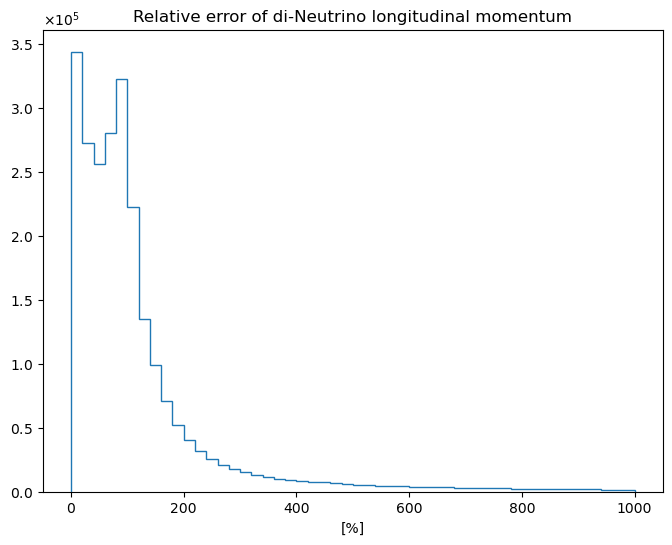

In [27]:
fig = plt.figure(figsize = (8, 6))
plt.title('Relative error of di-Neutrino longitudinal momentum')
plt.hist(pz_rel_err[pz_rel_err < 10]*100, histtype='step', bins=50)
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.xlabel('[%]')
print(f'Truncated events with relative error beyond 1000%, counts:{len(pz_rel_err[pz_rel_err > 10])}, {"%1f"%(len(pz_rel_err[pz_rel_err > 10])*100/len(pz_rel_err))}% of entire dataset')

# Trial run of the Lorentz Boost Network

In [ ]:
import tensorflow as tf
# *pip install lbn* in the console first
os.system('pip install lbn')
from lbn import LBN

## $M_{T2}$-assisted on-shell reconstruction of missing momenta and its application to spin measurement at the LHC

consider the process:
$$
pp \to H \to W W^* \to \ell_1 \nu_1 \: \ell_2 \nu_2
$$
denote the four-momenta: $i \in \{1,2\}$
* $p^\mu (\ell_i)\to p_i$
* $p^\mu (\nu_i )\to k_i$

Define trial masses of the parent particle and neutrino: $m_W$ and $m_\nu$
* $(p_i + k_i)^2 = {m_W}^2$
* ${k_i}^2 = {m_\nu}^2$
* $\mathbf{k}_{1T} + \mathbf{k}_{2T} = \mathbf{p}^\text{miss}_T$

Parameterize the transverse momentum $\mathbf{k}_{iT}$   
E.g.: Define a vector $\tilde{\mathbf{k}}_T$ and set $k_{1T} = \tilde{\mathbf{k}}_T$, consequently $\mathbf{p}_T^\text{miss} - \tilde{\mathbf{k}_{T}} = \mathbf{k}_{2T}$  
The longitudinal component:
$$
k_{iL} = \frac{1}{(E^\ell_{iT})^2} \left[ p_{iL}A_i \pm \sqrt{{p_{iL}}^2 + (E^\ell_{iT})^2} \sqrt{{A_i}^2 - (E^\ell_{iT}E^\nu_{iT})^2} \right] \equiv \tilde{k}_{iL}^\pm
$$
Where:
* $E^\ell_{iT} = \sqrt{{p_i}^2 + |\mathbf{p}_{iT}|^2}$
* $E^\nu_{iT} = \sqrt{{m_\nu}^2 + |\mathbf{k}_{iT}|^2}$
* $A_i = \frac{1}{2} \left( {m_W}^2 - {m_\nu}^2 - {p_i}^2 \right) + \mathbf{p}_{iT} \cdot \mathbf{k}_{iT}$

$$
M^{(i)}_T = \sqrt{{p_i}^2 + {m_\nu}^2 + 2\left(E^\ell_{iT}E^\nu_{iT} - \mathbf{p}_{iT} \cdot \mathbf{k}_{iT}\right)}
$$
The condition for $\tilde{k}_{iL}^{\pm}$ to be *real* is when $|A_i| \geq E^\ell_{iT}E^\nu_{iT}$  
or equivalently $m_W \geq \mathrm{max}\{M_T^{(1)},M_T^{(2)}\}$   

The ideal choice for $\tilde{k}_T$ is one that minimizes $\mathrm{max}\{M_T^{(1)},M_T^{(2)}\}$  
Under the constraint $\mathbf{k}_{1T} + \mathbf{k}_{2T} = \mathbf{p}^\text{miss}_T$ where we have previously set $\mathbf{k}_{1T} = \tilde{\mathbf{k}_T}$  
The minimizing solution is defined as a collider variable $M_{T2}$
$$
M_{T2} \equiv  \min_{\mathbf{k}_{1T} + \mathbf{k}_{2T} = \mathbf{p}^\text{miss}_T} \left[ \max \{M_T^{(1)},M_T^{(2)}\} \right]
$$